In [1]:
from functions.load_training_data import load_rescaled_samples_opt
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

# Load Training Samples

Creating mask composites...
	Composites created in 0 minutes, 52.15 seconds
Rescaling data...
	Data rescaled in 7 minutes, 40.52 seconds
Cropping rescaled data...
Data cropped in 0 minutes, 5.44 seconds


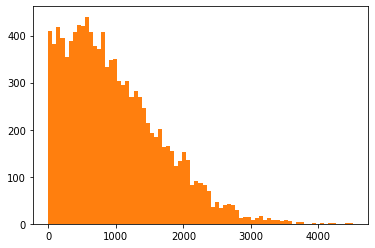

In [2]:
cropped_sizes, cropped_comps, cropped_imgs = load_rescaled_samples_opt(n_samples=150, loud=True)

/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/opt/tljh/user/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


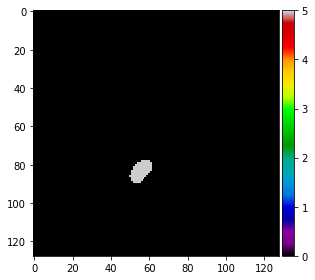

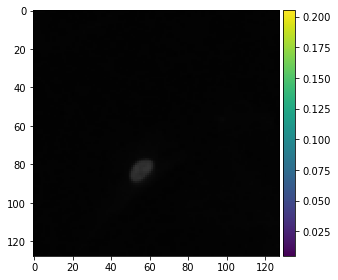

In [3]:
io.imshow(cropped_comps[200], cmap='nipy_spectral'); plt.figure()
io.imshow(cropped_imgs[200])

# Configure GPU

In [4]:
from functions.tf_config import config_gpu

config_gpu(4, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 4


# Configure Model

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=(128, 128, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(32, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1)
])

In [6]:
start = time.time()
img_tensor = tf.convert_to_tensor(cropped_imgs)
size_tensor = tf.convert_to_tensor(cropped_sizes)
end = time.time() - start
print("Tensors created in %d minutes, %.2f seconds" %((end // 60), (end % 60)))

Tensors created in 4 minutes, 8.04 seconds


In [7]:
img_tensor.shape

TensorShape([11250, 128, 128, 3])

In [8]:
loss_fn = keras.losses.MeanAbsoluteError(
                reduction='auto', name='mean_absolute_error')

In [9]:
opt = keras.optimizers.Adam(learning_rate=.01)
model.compile(optimizer=opt, loss=loss_fn, metrics='mean_absolute_error')

In [16]:
model.fit(img_tensor, size_tensor, epochs=5, verbose=1, validation_split=0.11)

Epoch 1/5
313/313 [==============================] - 3s 8ms/step - loss: 66.8816 - mean_absolute_error: 66.8816 - val_loss: 315.7300 - val_mean_absolute_error: 315.7300
Epoch 2/5
313/313 [==============================] - 2s 7ms/step - loss: 68.3702 - mean_absolute_error: 68.3702 - val_loss: 445.2173 - val_mean_absolute_error: 445.2173
Epoch 3/5
313/313 [==============================] - 2s 7ms/step - loss: 65.9718 - mean_absolute_error: 65.9718 - val_loss: 381.3334 - val_mean_absolute_error: 381.3334
Epoch 4/5
313/313 [==============================] - 2s 7ms/step - loss: 66.2586 - mean_absolute_error: 66.2586 - val_loss: 305.3649 - val_mean_absolute_error: 305.3649
Epoch 5/5
313/313 [==============================] - 2s 7ms/step - loss: 64.9640 - mean_absolute_error: 64.9640 - val_loss: 365.6221 - val_mean_absolute_error: 365.6221
